# Origin of Genome Replication

In this assignment, we will:
1. Verify that your solutions for exercises in Topic 1 are implemented correctly
2. Extend these solutions
3. Apply them to scenarios of both success and failure

## Verifying solutions to Topic 1 are correct
Please see Topic1 notebook for detailed information. You must copy Topic1_helper.py to this folder for these commands to work.

In [1]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np

# Put all your solutions into Assignment1_helper.py as this is the script which is autograded
import Assignment1_helper 
import Topic1_helper

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

In [2]:
Topic1_helper.count("ACAACTATGCATACTATCGGGAACTATCCT","ACTAT")

3

In [3]:
print(Topic1_helper.frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",5))
print(Topic1_helper.frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",4))

(['ACTAT'], 3)
(['ACTA', 'CTAT'], 3)


In [4]:
Topic1_helper.reverse_complement("cagt")

'actg'

In [5]:
text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
freq_map = Topic1_helper.frequency_table(text,3)
pd.Series(freq_map)

atc    21
tca    17
caa    12
aat    10
atg    15
       ..
gcg     4
ggg     1
cga     7
ccg     3
ccc     1
Length: 64, dtype: int64

In [6]:
Topic1_helper.better_frequent_words(text,9)

(['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat'], 3)

In [7]:
data = pd.read_table("http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt",header=None)
genome = data.values[0,0]
skews = Topic1_helper.skew(genome)
skews = pd.Series(Topic1_helper.skew(genome))
skews

0             0
1             0
2             1
3             0
4             0
           ... 
4639671   -2630
4639672   -2630
4639673   -2630
4639674   -2630
4639675   -2631
Length: 4639676, dtype: int64

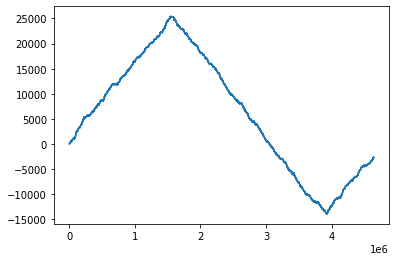

In [8]:
%matplotlib inline
skews.plot.line();

## Moving past prokaryotic organisms

We developed a bioinformatics algorithm that at a glance seems to detect origin sequences in a genome, but a closer inspection reveals that we have only tested this algorithm for a single prokaryotic organism. This *skew* algorithm will perform well on organisms with cirucular chromosomes, but what happens when we try it on an organism with linear chromosomes? Let's take a look at Yeast. 

### Yeast Origin Database
It is a difficult biological question when you consider more complicated genomes. Even genomes that are well studied such as Yeast. Here is a link to a database with origin sequences: 

http://cerevisiae.oridb.org/search.php?chr=all&confirmed=true&likely=true&dubious=true&name= 

Notice anything? I notice the number of confirmed and likely origin locations on each chromosome. Oh yeah. We are now dealing with multiple chromosomes as well of course. Let's see how our algorithm does on this data. 

This is a good time to talk about file formats. Bioinformatics loves file formats and they often are not everything we would desire. A common sequence format is called a FASTA file. I have downloaded the Yeast genome for us, and we can take a look at the top:

In [9]:
!head {home}/csc-448-student/data/GCF_000146045.2_R64_genomic.fna

>NC_001133.9 Saccharomyces cerevisiae S288C chromosome I, complete sequence
ccacaccacacccacacacccacacaccacaccacacaccacaccacacccacacacacacatCCTAACACTACCCTAAC
ACAGCCCTAATCTAACCCTGGCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCAT
TCAACCATACCACTCCGAACCACCATCCATCCCTCTACTTACTACCACTCACCCACCGTTACCCTCCAATTACCCATATC
CAACCCACTGCCACTTACCCTACCATTACCCTACCATCCACCATGACCTACTCACCATACTGTTCTTCTACCCACCATAT
TGAAACGCTAACAAATGATCGTAAATAACACACACGTGCTTACCCTACCACTTTATACCACCACCACATGCCATACTCAC
CCTCACTTGTATACTGATTTTACGTACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTCTCAGATTC
CACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATTATGCACGGCACTTGCCTCAGCGG
TCTATACCCTGTGCCATTTACCCATAACGCCCATCATTATCCACATTTTGATATCTATATCTCATTCGGCGGTcccaaat
attgtataaCTGCCCTTAATACATACGTTATACCACTTTTGCACCATATACTTACCACTCCATTTATATACACTTATGTC


The first line showing the name of the chromosome (but could be anything) begins with a ``>`` sign. If we look through the file, we will find a few of these lines, which means that this file actually contains multiple sequences (in this case multiple chromosomes).

The other thing you will notice is that the sequence is actually broken up over multiple lines. The destinction between lines is purely formatting based. It has nothing to do biologically, so when we read in the file, we must remove newlines.

In [10]:
!grep chromosome {home}/csc-448-student/data/GCF_000146045.2_R64_genomic.fna

>NC_001133.9 Saccharomyces cerevisiae S288C chromosome I, complete sequence
>NC_001134.8 Saccharomyces cerevisiae S288C chromosome II, complete sequence
>NC_001135.5 Saccharomyces cerevisiae S288C chromosome III, complete sequence
>NC_001136.10 Saccharomyces cerevisiae S288C chromosome IV, complete sequence
>NC_001137.3 Saccharomyces cerevisiae S288C chromosome V, complete sequence
>NC_001138.5 Saccharomyces cerevisiae S288C chromosome VI, complete sequence
>NC_001139.9 Saccharomyces cerevisiae S288C chromosome VII, complete sequence
>NC_001140.6 Saccharomyces cerevisiae S288C chromosome VIII, complete sequence
>NC_001141.2 Saccharomyces cerevisiae S288C chromosome IX, complete sequence
>NC_001142.9 Saccharomyces cerevisiae S288C chromosome X, complete sequence
>NC_001143.9 Saccharomyces cerevisiae S288C chromosome XI, complete sequence
>NC_001144.5 Saccharomyces cerevisiae S288C chromosome XII, complete sequence
>NC_001145.3 Saccharomyces cerevisiae S288C chromosome XIII, complete seq

**Exercise 7.** Write a function that reads in the sequences in a FASTA file. You must handle the newlines and the headers.

In [11]:
file = f"{home}/csc-448-student/data/GCF_000146045.2_R64_genomic.fna"
headers,sequences = Assignment1_helper.read_fasta(file)
headers

['>NC_001133.9 Saccharomyces cerevisiae S288C chromosome I, complete sequence',
 '>NC_001134.8 Saccharomyces cerevisiae S288C chromosome II, complete sequence',
 '>NC_001135.5 Saccharomyces cerevisiae S288C chromosome III, complete sequence',
 '>NC_001136.10 Saccharomyces cerevisiae S288C chromosome IV, complete sequence',
 '>NC_001137.3 Saccharomyces cerevisiae S288C chromosome V, complete sequence',
 '>NC_001138.5 Saccharomyces cerevisiae S288C chromosome VI, complete sequence',
 '>NC_001139.9 Saccharomyces cerevisiae S288C chromosome VII, complete sequence',
 '>NC_001140.6 Saccharomyces cerevisiae S288C chromosome VIII, complete sequence',
 '>NC_001141.2 Saccharomyces cerevisiae S288C chromosome IX, complete sequence',
 '>NC_001142.9 Saccharomyces cerevisiae S288C chromosome X, complete sequence',
 '>NC_001143.9 Saccharomyces cerevisiae S288C chromosome XI, complete sequence',
 '>NC_001144.5 Saccharomyces cerevisiae S288C chromosome XII, complete sequence',
 '>NC_001145.3 Saccharomy

In [12]:
pd.Series(sequences)

0     ccacaccacacccacacacccacacaccacaccacacaccacacca...
1     AAATAGCCCTCATGTACGTCTCCTCCAAGCCCTGTTGTCTCTTACC...
2     cccacacaccacacccacaccacacccacacaccacacacaccaca...
3     acaccacacccacaccacacccacacacaccacacccacacaccac...
4     CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAA...
5     GATCTCGCAAGTGCATTCCTAGACTTAATTCATATCTGCTCCTCAA...
6     ccacacccacacacaccacacccacacccacacactACCCTAACAC...
7     cccacacacaccacacccacacaccacacccacactTTTCACATCT...
8     cacacacaccacacccacaccacaccacaccacacccacacccaca...
9     CCcacacacacaccacacccacacccacacacaccacacccacaca...
10    caccacacccacacaccacacccacacacacaccacacccacacac...
11    cacacacacacaccacccacacaccacaccacacaccacaccacac...
12    Ccacacacacaccacacccacaccacacccacacccacacccacac...
13    CCGGCTTTCTGAccgaaattaaaaaaaaaaaatgaaaatgaaaccC...
14    acaccacacccacaccacacccacacccacacaccacacccacaca...
15    AAATAGCCCTCATGTACGTCTCCTCCAAGCCCTGTTGTCTCTTACC...
16    TTCATAATTAATTTTTTATATATATATTATATTATAATATTAATTT...
dtype: object

**Problem 1:** What is the average length of a chromosome in Yeast?

In [13]:
avg = None
#### Your solution here
print(f"{avg} bp")

715123.8235294118 bp


**Problem 2:** Apply your skew function to the first 2000 bp of the first chromosome. Graph the skew as previously done. Are there any clear origin of replication locations? If not, do you have any guesses as to why? We will discuss in class with Dr. Davidson. Write your guesses down here, so we can impress her or alternatively give her a good laugh :)

Don't forget that you can also look into the database of known sites here: http://cerevisiae.oridb.org/search.php?chr=all&confirmed=true&likely=true&dubious=true&name= 

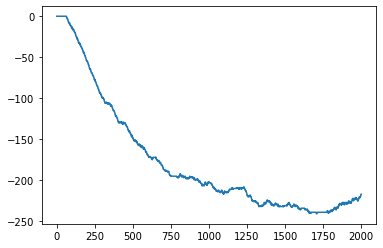

In [14]:
import pandas as pd
skews = pd.Series(Topic1_helper.skew(sequences[0][:2000]))
skews.plot.line();

In [15]:
# Don't forget to push!